<a href="https://colab.research.google.com/github/nickwharff/CS167_Notes/blob/main/Day06_P1_Intro2Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day06
## Part 1: Intro to Scikit Learn

#### CS167: Machine Learning, J-Term 2023

Tuesday, January 10th, 2023 -- Session I

[⏮ Day05 Part 2](https://github.com/merriekay/j23_cs167_notes/blob/main/Day05_P1_Decision_Trees.ipynb) | [Day06 Part 2⏩](https://github.com/merriekay/j23_cs167_notes/blob/main/Day06_P2_RandomForests.ipynb)

## This Week Overview:

| **Date** | **Day of Week** | **Day of Class** | **Topic**                               | **Assigned** | **Due (11:59pm)** |
|----------|-----------------|------------------|-----------------------------------------|--------------|-------------------|
| 1/9/23   | M               | Day05            | Decision Trees Part I                   | [N3](https://classroom.github.com/a/960Y0T8W)           | Q1               |
|          |                 |                  | Decision Trees Part II                  |              |                   |
| 1/10/23  | T               | Day06            | Intro to Scikit Learn                   | [N4](https://classroom.github.com/a/BFoBfBrR)           | N3                |
|          |                 |                  | Random Forests                          |              |                   |
| 1/11/23  | W               | Day07            | SVMs                                    | P1           | N4                |
|          |                 |                  | PCA                                     |              |                   |
| 1/12/23  | R               | Day08            | Intro to Neural Networks -- Percpetrons | N5           |                   |
|          |                 |                  | Perceptron Code                         |              |                   |
| 1/13/23  | F               | Day09            | Artifical Neural Networks               | Q2           | N5                |
|          |                 |                  | ANN Code                                |              |                   |


## Helpful Links:
📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vStj3FCEJqloUMLn2VtHa4yy1ILY6WvABhu4jd4cVUpPGkrx1mEjfTFmd77DMESR9HJ-8UBxgMDJL06/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/j23_cs167/Syllabus.html)


# Admin Stuff:
Grading:
- Notebook 0, Notebook #1, and Notebook #2 are graded.

You should be working on: 
- [Notebook #3](https://classroom.github.com/assignment-invitations/8f93944b7a16d6c915f23a39c2068d28) is due tonight by 11:59pm
- [Notebook #4](https://classroom.github.com/a/BFoBfBrR) is released today, due tomorrow night by 11:59pm. 

# Quick Review:

Decision Trees:


## What is a decision tree?
<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day05_dt_ex1.png?raw=1" width=800/>
</div>

## Great, now how do I build (grow) a tree?

One algorithm that builds a decision tree is called the __ID3 Decision Tree Learning Algorithm__.

It goes like this: 
    
__Main ID3 Loop__:
1. Assign A to be the _best_ decision feature for the next node.
2. Assign A as decision feature for the node
3. For each possible attribute of A, create a new descendant of node
4. Sort training examples to leaf nodes
5. If Training examples are perfectly classified, the STOP, Else, iterate over new leaf nodes.

### What does 'best' mean? How can we tell which node is *best*?

## Calculating Information Gain

Starting a decision tree with the feature that tells us the most about the classification is a core part of the __ID3 Decision Tree Learning Algorithm__. 

__Information Gain__ is the quantity that tells us how much information splitting our data using a given column gives us.

$Information Gain = Entropy_{before} - Expected Entropy_{after}$

Process:
1. Calculate the entropy of the data before you split it up by the values of the chosen node. 
2. Calculate the expected entropy after you split the data up at the chosen node
3. Subtract the result of step 1 from the result of step 2. 

## Calculating Entropy Prior

__Prior Probability__:aka the 'prior'
- the split of the examples
- if I have 9 positive examples and 5 negative examples, my prior is:

$\langle 9/14, 5/14 \rangle \approx \langle 0.64, 0.36 \rangle$
> the prior probabilities must sum to 1

## Calculating Entropy:

Calculating the entropy when prior is $\langle P_1, ..., P_c\rangle$

<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day05_entropy_calc.png?raw=1" width=600/>
</div>

In [ ]:
import math
def entropy(percentage_list):
    #input: percentage_list consists of float values that sum to 1.0 
    #return: calculation of entropy for input percentages
    result = 0
    for percentage in percentage_list:
        if percentage != 0:
            result += -percentage*math.log2(percentage)
    return result

In [ ]:
entropy([9/14, 5/14])

0.9402859586706311

## Example: Calculate the Original Entropy

Start by calculating the entropy of the example __before__ picking a feature:
- $\langle 0.5, 0.5 \rangle = 1$

> __Note__: the original entropy is not always going to be 1, be careful here
<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day05_patrons_entropy.png?raw=1" width=600/>
</div>

In [ ]:
entropy([.5,.5])

1.0

## Example: Calculate the Expected Entropy

The __Expected Entropy__ for a feature is defined as the weighted sum of entropies multiplied by the fraction of samples that belong to each set: 

$H(X) = - \sum_{i=1}^{n} P(x_i)\log_{2} P(x_i)$


<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day05_expected_entropy1.png?raw=1" width=700/>
</div>

## Example: Calculate the Information Gain

The __information gain__ is *difference* between the entropy before the test and the expected entropy after the test. 

$Information Gain = Entropy_{before} - Expected Entropy_{after}$

- Original Entropy: 1
- Expected Entropy: 0.459
- Information Gain = 1 - 0.459 = __0.541__

## 💬 Review Question:

You are given the following dataset where: 
- Day is the day of the week
- Chicken Wrap is whether or not a chicken wrap was available
- Hungry is whether you were hungry or not
- Choice is the choice you made as to where to eat

### What is the information gain of the `Hungry` column?

| **Day**   | **Chicken Wrap** | **Hungry** | **Choice** |
|-----------|------------------|------------|------------|
| Monday    | yes              | no         | Hubbell    |
| Wednesday | no               | yes        | Starbucks  |
| Monday    | yes              | yes        | Hubbell    |
| Wednesday | no               | no         | Hubbell    |
| Monday    | no               | yes        | Starbucks  |

# ✨ New Material

# Introduction to Scikit Learn:

`scikit-learn` is one of Python's main Machine Learning Libraries.
- built on `NumPy`, `SciPy`, and `matplotlib`
- plays nicely with `pandas`
- https://scikit-learn.org/stable/ 

# The Scikit Learn 'Algorithm': 

When working in Scikit Learn (`sklearn`), there is a general pattern that we can follow to implement any supported machine learning algorithm.

It goes like this: 
1. Load your data using `pd.read_csv()`
2. Split your data `train_test_split()`
3. Create your classifier/regressor object
4. Call `fit()` to train your model
5. Call `predict()` to get predictions
6. Call a metric function to measure the performance of your model.

## All together, it looks something like this:

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
path = 'datasets/irisData.csv' #'/content/drive/MyDrive/CS167/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))
     

Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versic

# Now, let's go through step-by-step:

## Step 1: Import libraries and load your data

We should be pretty familiar with this one.
- mount your drive
- import any relevant libraires
- use `pd.read_csv()` to load in your dataset

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
path = 'datasets/irisData.csv' #'/content/drive/MyDrive/CS167/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

## Step 2: Split Data

Cross-Validation is an important step in machine learning which enables us to evaluate our models. To do this, we need to split our data into `train_data` and `test_data`.
<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day04_cross_validation.png?raw=1" width=400/>
</div>

Sklearn takes this a step futher and splits the data up into 4 pieces: 
- `train_data`: holds the predictor variables of the training set
- `train_sln`: holds the target variable of the training set
- `test_data`: holds the predictor variables of the testing set
- `test_sln`: holds the target varibles of the testing set

<div>
<img src="https://github.com/merriekay/j23_cs167_notes/blob/main/images/day06_traintestsplit.png?raw=1" width=600/>
</div>

## Step 2: Splitting Data (the code)

In [ ]:
#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
    train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

In [ ]:
# take a look at the data... make sure you understand what split of data is stored in each 
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

train_data.head()

train_data shape:  (120, 4)
test_data shape:  (30, 4)
train_sln shape:  (120,)
test_sln shape:  (30,)


,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


## Step 3: Create classifier/regressor object

The syntax/wording for this is going to come directly from the `sklearn` documentation.
- [Scikit Learn Decision Tree documentation](https://scikit-learn.org/stable/modules/tree.html)

The name of the model will change based on whether you are doing a __classification__ or __regression__. 
- generally in the name: 
    - `tree.DecicionTreeClassifier()`
    - `tree.DecisionTreeRegressor()`

In [ ]:
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

## Step 4: Call `fit()` to train the model

Each machine learning model has a training process associated with it. Scikit learn makes it easy to train whatever model you choose by simply calling `fit()` on that model. 

We generally pass two things into `fit()`:
- `train_data`: the predictor variables we want to train our model on
- `train_sln`: the labels for each training examples


In [ ]:
dt.fit(train_data, train_sln)

DecisionTreeClassifier()

## Step 5: Call `predict()` to get predictions

After our model is trained, it's time to run our testing data through our model and see what the model predicts. 

Scikit learn lets us do this in one line: 
- we're saving what the function is returning as `predictions`
- passing in `test_data`, which is the data without labels that was not included in training

In [ ]:
predictions = dt.predict(test_data)

# Step 6: Evaluate the Model

Now that we have some predictions, we need to check to see how close we were by passing our predictions and the actual correct answers into a metric function. 

| **Type of ML** | **Metric**                | **Description**                                                                                              |
|----------------|---------------------------|:--------------------------------------------------------------------------------------------------------------|
| Classification | Accuracy                  | Number correct examples divided by total number                                                              |
| Classification | Confusion Matrix          | Detailed table of where our model got confused. |
| Regression     | Mean Absolute Error (MAE) | The average absolute distance from the target variable                                                       |
| Regression     | Mean Squared Error (MSE)  | The average squared distance from the target variable                                                        |
| Regression     | $R^2$                     | 1: perfectly fit data<br>0: same performance as guessing the mean of the target variable<br>-1: really bad.  |

Available metrics can be found in the sklearn documentation [[sklearn metrics]](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [ ]:
from sklearn import metrics
#6. call a metric function to evaluate the model
print("Accuracy:", metrics.accuracy_score(test_sln, predictions))

Accuracy: 0.9


### Here's an example of displaying a confusion matrix:

Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay 


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)

                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0                8               3
Iris-virginica             0                2               8


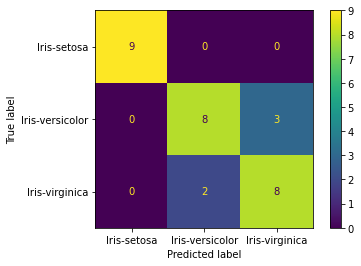

In [ ]:
#displaying a confusion matrix

# option #1: text
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

# option #2: prettify
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=iris_labels)
displ.plot()
plt.show()

## (Optional) Step 7: Print out the results to debug

Sometimes its helpful to take a closer look at your predictions. Here's some code to do just that:

In [ ]:
# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor


# 💬 Group Exercise #1: 

Take a look at the [Decision Tree Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):
- Experiment with different `random_state`s
- Explore different parameters you could use in the `DecisionTreeClassifier`
- Can you improve the 90% accuracy with `random_state=41`?
- What happens when you do this? Why?

In [ ]:
smol_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2)
smol_dt.fit(train_data, train_sln)
predictions = smol_dt.predict(test_data)
acc = metrics.accuracy_score(test_sln, predictions)
print(acc)

0.6333333333333333


# Plotting Decision Trees

You can use `matplotlib` to plot decision trees using the `sklearn.tree.plot_tree` method. 

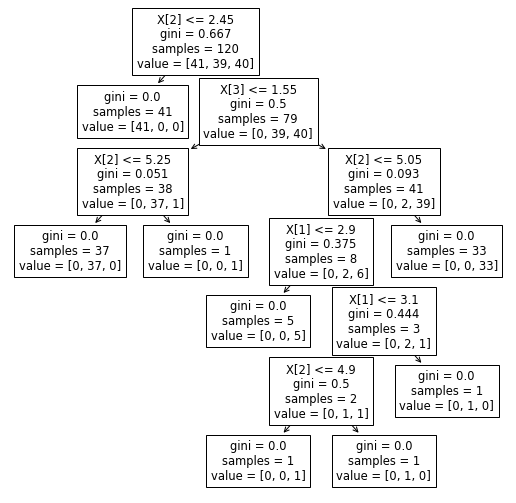

In [ ]:
# visualizing decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9)) # Makes it so the graph isn't tiny
tree.plot_tree(dt); #if you remove the ;, you'll get more information about the tree

In [ ]:
#including this to make the plot display during slide mode

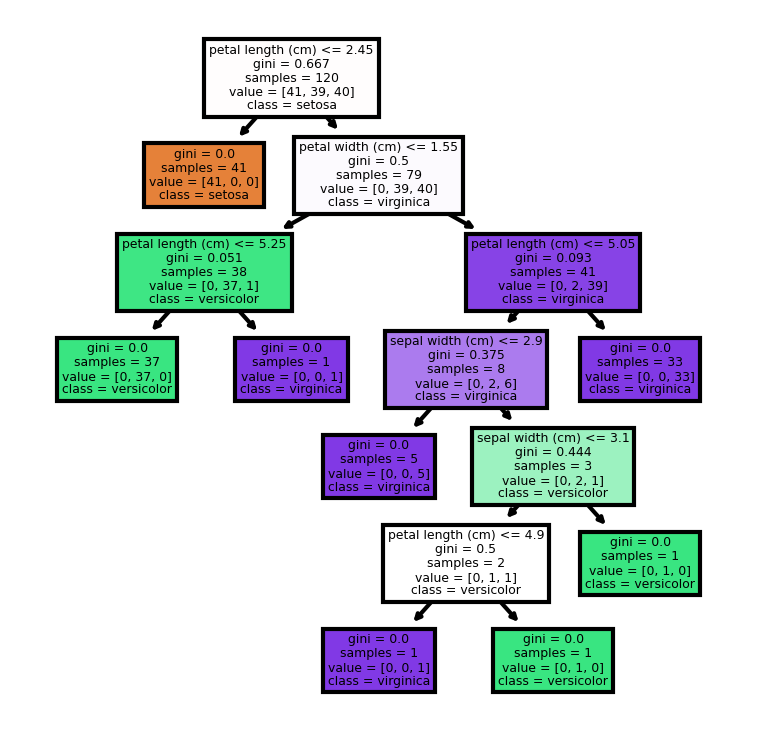

In [ ]:
#tweak paramters to make it pretty
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#including this to make the plot display during slide mode

## Another pretty Confusion Matrix

Text(0.5, 0, 'Predicted label')

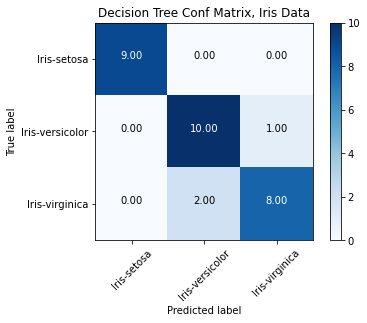

In [ ]:
# a pretty confusion matrix
import itertools

cm=metrics.confusion_matrix(test_sln,iris_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Decision Tree Conf Matrix, Iris Data')
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation=45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# 💬 Group Exercise #2: 

With the aid of the documentation, try the following:
- Create a decision tree with an early stopping parameter
- Visualize your trees to see if it is working right.
- Look at your performance metrics to see how it changes performance.
- Determine which of the featuers (petal length, sepal length, etc) were the most important.How does it determine these numbers?

In [ ]:
# code for exercise #2


# 💬 Group Exercise #3: 

Check out the [scikit-learn documentation here](https://scikit-learn.org/stable/modules/classes.html)

Find the documentation for the kNN classifier (i.e., the classifier, not an unsupervised algorithm). Answer the following questions:

- What is the default value of k it uses?
- Does it do weighted or unweighted kNN by default?
- What is the accuracy on the Iris dataset for k = 100, both weighted and unweighted?
- How do the weighted and unweighted versions do for small values of k?

# Let's try regression now:

Here we:
- load the data, get the right subset
- set predictors and target variables
- use `train_test_split()` to split the data

In [ ]:
# load in the vehicles.csv data for scikit learn
import pandas
import numpy

# load data, get the right subset
path = 'datasets/vehicles.csv' #'/content/drive/MyDrive/CS167/datasets/vehicles.csv'
data = pandas.read_csv(path)
gas_vehicles = data[data['fuelType']=='Regular'][['year', 'cylinders', 'displ', 'comb08']]
gas_vehicles.dropna(inplace=True)

# set the predictor variables and target variable
predictors= ['year', 'cylinders', 'displ']
target= 'comb08'

# use train_test_split() to split the data
train_data, test_data, train_sln, test_sln = train_test_split(gas_vehicles[predictors], gas_vehicles[target], test_size = 0.2, random_state=41)
train_data.head()

/Users/100022114/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,year,cylinders,displ
4256,1985,4.0,2.2
2685,1995,6.0,4.0
35058,2020,6.0,4.3
10678,1986,6.0,2.8
18702,1984,8.0,5.0


And then we do the next steps:
- build our model using `neighbors.KNeighborsRegressor()`
- fit our model using `fit()` and passing in `train_data` and `train_sln`
- get our predictions by calling `predict()`
- evaluate our predictions using `metrics.mean_squared_error()`, and `metrics.r2_score()`

In [ ]:
from sklearn import neighbors
# create our model
neigh = neighbors.KNeighborsRegressor()

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))
     

MSE:  6.798711839166046
MAE:  1.7742740134028294
r2:  0.7738706905208238


# Normalizing using `StandardScaler`


In [ ]:
train_data.head()

,year,cylinders,displ
4256,1985,4.0,2.2
2685,1995,6.0,4.0
35058,2020,6.0,4.3
10678,1986,6.0,2.8
18702,1984,8.0,5.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized

array([[-1.26567897, -0.90229747, -0.71992797],
       [-0.35862853,  0.41508442,  0.69575639],
       [ 1.90899757,  0.41508442,  0.93170379],
       ...,
       [ 1.81829253, -0.90229747, -0.87722623],
       [-0.44933357, -0.90229747, -0.48398058],
       [-0.35862853,  1.73246631,  1.48224771]])

# 💬 Group Exercise #4:
Look up an appropriate Decision Tree algorithm and apply it to the vehicles data:
- https://scikit-learn.org/stable/modules/classes.html
- Using Default values of the decision tree, what is the $R^2$ metric?
- Interpret the $R^2$ value... is it good or bad?

# 💬 Group Exercise #5:
Change your decision tree to have a `max_depth` of 3. 
- does this help or hurt the decision tree performance?

Compare your decision tree to a kNN algorithm:
- what values of k seem to help the performance?
- What else can you do to help the performance?

Can you get a higher $R^2$ valuue using a knn algorithm or adecision tree?
- what does this indicate about the data?